<a href="https://colab.research.google.com/github/verma-satyam/ML-Coding-Ninjas/blob/main/16.%20Tensorflow/2_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

one hot encoding of Y

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[0])
print(y_train[0].shape)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10,)


In [7]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

Showing Image

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
first_img = x_train[0]
first_img.shape

(28, 28)

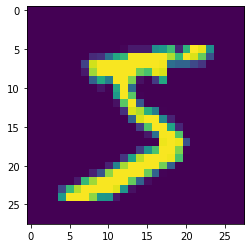

In [10]:
plt.imshow(first_img)
plt.show();

Model

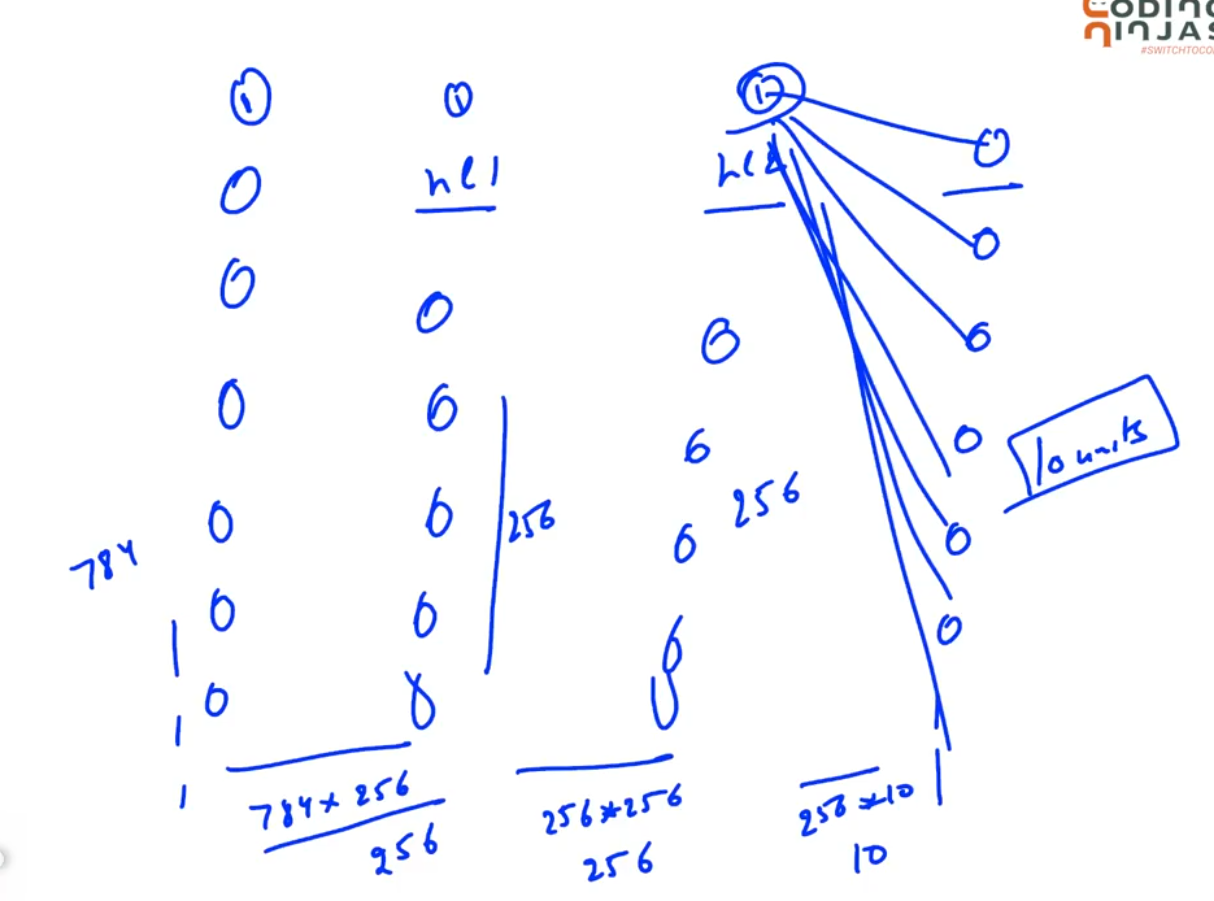

In [11]:
n_input = 784
n_hidden1 = 256
n_hidden2 = 256
n_classes = 10

weights = {
    'h1' : tf.Variable(tf.random.normal([n_input,n_hidden1]),trainable=True),
    'h2' : tf.Variable(tf.random.normal([n_hidden1,n_hidden2]),trainable=True),
    'out' : tf.Variable(tf.random.normal([n_hidden2,n_classes]),trainable=True),
}

biases = {
    'h1' : tf.Variable(tf.random.normal([n_hidden1]),trainable=True),
    'h2' : tf.Variable(tf.random.normal([n_hidden2]),trainable=True),
    'out' : tf.Variable(tf.random.normal([n_classes]),trainable=True),
}

Forward Propagation

In [12]:
def forward_prop(x,weights,biases):
  in_layer1 = tf.add( tf.matmul(x,weights['h1']), biases['h1'])
  out_layer1 = tf.nn.relu(in_layer1)

  in_layer2 = tf.add( tf.matmul(out_layer1,weights['h2']), biases['h2'])
  out_layer2 = tf.nn.relu(in_layer2)

  in_output = tf.add( tf.matmul(out_layer2,weights['out']), biases['out'])
  out_output = in_output
  return out_output

Optimization

In [21]:
for i in range(25):
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
  with tf.GradientTape(persistent=True) as tape:
    pred = forward_prop(x_train.reshape(x_train.shape[0],784),weights,biases)
    cost = tf.math.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels = y_train))
  optimize = optimizer.minimize(cost,var_list=[weights,biases],tape=tape)

In [22]:
optimize,cost

(<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=float32, numpy=29138.135>)

Predictions

In [23]:
pred = forward_prop(x_train.reshape(x_train.shape[0],784),weights,biases)
predictions = tf.argmax(pred,axis=1)
true_labels = tf.argmax(y_train,axis=1)
correct_predictions = tf.equal(predictions,true_labels)

In [24]:
predictions,true_labels,correct_predictions

(<tf.Tensor: shape=(60000,), dtype=int64, numpy=array([5, 0, 4, ..., 5, 6, 8])>,
 <tf.Tensor: shape=(60000,), dtype=int64, numpy=array([5, 0, 4, ..., 5, 6, 8])>,
 <tf.Tensor: shape=(60000,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>)

In [25]:
correct_predictions.numpy().sum() # training accuracy

49867

In [26]:
pred = forward_prop(x_test.reshape(x_test.shape[0],784),weights,biases)
predictions = tf.argmax(pred,axis=1)
true_labels = tf.argmax(y_test,axis=1)
correct_predictions = tf.equal(predictions,true_labels)

In [27]:
predictions,true_labels,correct_predictions

(<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>,
 <tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>,
 <tf.Tensor: shape=(10000,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>)

In [28]:
correct_predictions.numpy().sum() #testing accuracy

8252